<p style="align: center;"><img align=center src="https://s8.hostingkartinok.com/uploads/images/2018/08/308b49fcfbc619d629fe4604bceb67ac.jpg" width=500 height=450/></p>

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ</b></h3>

<h3 style="text-align: center;"><b>Домашнее задание. Продвинутый поток. Весна 2021</b></h3>

Это домашнее задание будет посвящено полноценному решению задачи машинного обучения.

Есть две части этого домашнего задания: 
* Сделать полноценный отчет о вашей работе: как вы обработали данные, какие модели попробовали и какие результаты получились (максимум 10 баллов). За каждую выполненную часть будет начислено определенное количество баллов.
* Лучшее решение отправить в соревнование на [kaggle](https://www.kaggle.com/c/advanced-dls-spring-2021/) (максимум 5 баллов). За прохождение определенного порогов будут начисляться баллы.


**Обе части будут проверяться в формате peer-review. Т.е. вашу посылку на степик будут проверять несколько других студентов и аггрегация их оценок будет выставлена. В то же время вам тоже нужно будет проверить несколько других учеников.**

**Пожалуйста, делайте свою работу чистой и понятной, чтобы облегчить проверку. Если у вас будут проблемы с решением или хочется совета, то пишите в наш чат в телеграме или в лс @runfme. Если вы захотите проаппелировать оценку, то пипшите в лс @runfme.**

**Во всех пунктах указания это минимальный набор вещей, которые стоит сделать. Если вы можете сделать какой-то шаг лучше или добавить что-то свое - дерзайте!**

# Как проверять?

Ставьте полный балл, если выполнены все рекомендации или сделано что-то более интересное и сложное. За каждый отсустствующий пункт из рекомендация снижайте 1 балл.

# Метрика

Перед решением любой задачи важно понимать, как будет оцениваться ваше решение. В данном случае мы используем стандартную для задачи классификации метрику ROC-AUC. Ее можно вычислить используя только предсказанные вероятности и истинные классы без конкретного порога классификации + она раотает даже если классы в данных сильно несбалансированны (примеров одного класса в десятки раз больше примеров длугого). Именно поэтому она очень удобна для соревнований.

Посчитать ее легко:


In [5]:
from sklearn.metrics import roc_auc_score

y_true = [
    0,
    1,
    1,
    0,
    1
]

y_predictions = [
    0.1,
    0.9,
    0.4,
    0.6,
    0.61
]

roc_auc_score(y_true, y_predictions)

0.8333333333333333

# Первая часть. Исследование

In [6]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## Загрузка данных (2 балла)

1) Посмотрите на случайные строчки. 

2) Посмотрите, есть ли в датасете незаполненные значения (nan'ы) с помощью data.isna() или data.info() и, если нужно, замените их на что-то. Будет хорошо, если вы построите табличку с количеством nan в каждой колонке.

In [7]:
train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')
submission = pd.read_csv("./submission.csv")

In [8]:
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

In [9]:
train.replace(" ", np.nan, inplace=True)
test.replace(" ", np.nan, inplace=True)

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5273 non-null   object 
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

In [11]:
train["TotalSpent"] = train["TotalSpent"].fillna(0).astype(float)
test["TotalSpent"] = test["TotalSpent"].fillna(0).astype(float)

In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   float64
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

In [13]:
train.isna().sum()

ClientPeriod                0
MonthlySpending             0
TotalSpent                  0
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
Churn                       0
dtype: int64

## Анализ данных (3 балла)

1) Для численных призанков постройте гистограмму (*plt.hist(...)*) или boxplot (*plt.boxplot(...)*). Для категориальных посчитайте количество каждого значения для каждого признака. Для каждой колонки надо сделать *data.value_counts()* и построить bar диаграммы *plt.bar(...)* или круговые диаграммы *plt.pie(...)* (хорошо, елси вы сможете это сделать на одном гарфике с помощью *plt.subplots(...)*). 

2) Посмотрите на распределение целевой переменной и скажите, являются ли классы несбалансированными.

3) (Если будет желание) Поиграйте с разными библиотеками для визуализации - *sns*, *pandas_visual_analysis*, etc.

Второй пункт очень важен, потому что существуют задачи классификации с несбалансированными классами. Например, это может значить, что в датасете намного больше примеров 0 класса. В таких случаях нужно 1) не использовать accuracy как метрику 2) использовать методы борьбы с imbalanced dataset (обычно если датасет сильно несбалансирован, т.е. класса 1 в 20 раз меньше класса 0).

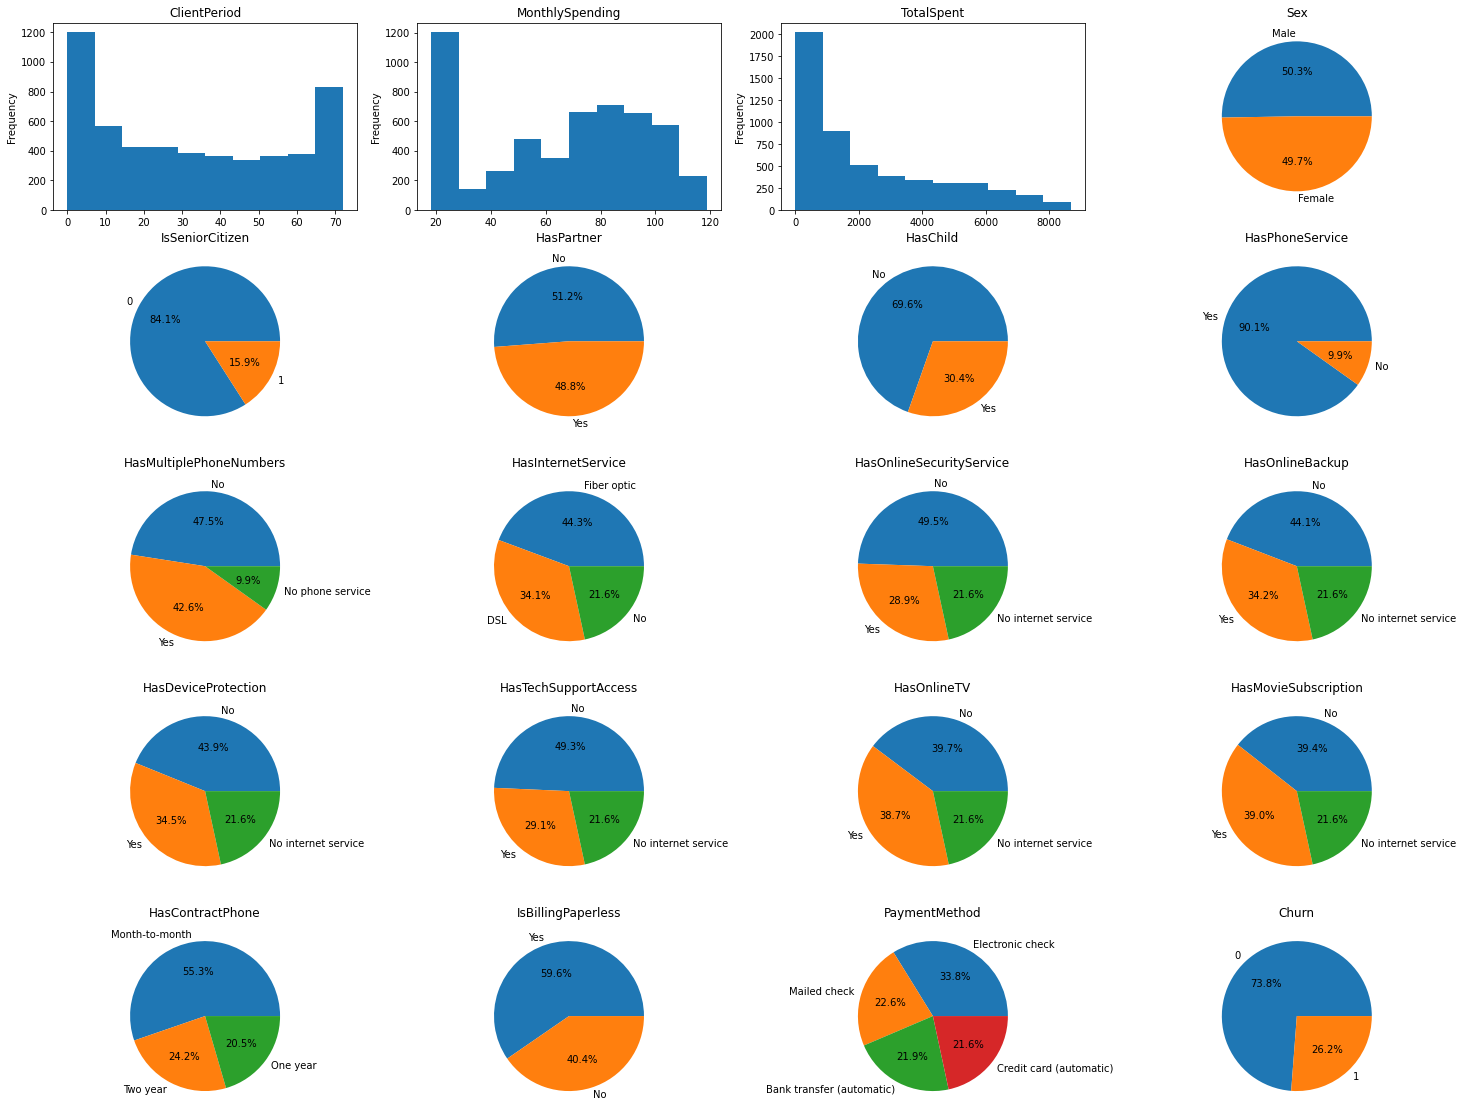

In [14]:
fig, ax = plt.subplots(5, 4, figsize=(25, 20))
ax = ax.flatten()
k = 0
for i in num_cols:
    ax[k].set_title(i)
    train[i].plot(kind="hist", ax=ax[k])
    k += 1
for i in cat_cols:
    ax[k].set_title(i)
    ax[k].pie(
        train[i].value_counts(),
        autopct="%1.1f%%",
        labels=train[i].value_counts().index
    )
    k += 1
ax[-1].set_title("Churn")
ax[-1].pie(
    train.Churn.value_counts(),
    autopct="%1.1f%%",
    labels=train.Churn.value_counts().index
)
plt.show()

(Дополнительно) Если вы нашли какие-то ошибки в данных или выбросы, то можете их убрать. Тут можно поэксперементировать с обработкой данных как угодно, но не за баллы.

In [15]:
train.duplicated().value_counts()

False    5268
True       14
dtype: int64

In [16]:
train.duplicated(keep=False).value_counts()

False    5254
True       28
dtype: int64

In [17]:
train = train.drop_duplicates()

<BarContainer object of 2 artists>

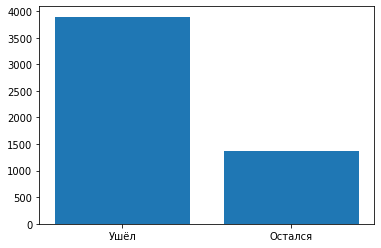

In [18]:
plt.bar(height=train.Churn.value_counts(), x=["Ушёл", "Остался"])

## Применение линейных моделей (3 балла)

1) Обработайте данные для того, чтобы к ним можно было применить LogisticRegression. Т.е. отнормируйте числовые признаки, а категориальные закодируйте с помощью one-hot-encoding'а. 

2) С помощью кроссвалидации или разделения на train/valid выборку протестируйте разные значения гиперпараметра C и выберите лучший (можно тестировать С=100, 10, 1, 0.1, 0.01, 0.001) по метрике ROC-AUC. 

Если вы разделяете на train/valid, то используйте LogisticRegressionCV. Он сам при вызове .fit() подберет параметр С. (не забудьте передать scroing='roc_auc', чтобы при кроссвалидации сравнивались значения этой метрики, и refit=True, чтобы при потом модель обучилась на всем датасете с лучшим параметром C). 


(более сложный вариант) Если вы будете использовать кроссвалидацию, то преобразования данных и LogisticRegression нужно соединить в один Pipeline с помощью make_pipeline, как это делалось во втором семинаре. Потом pipeline надо передать в GridSearchCV. Для one-hot-encoding'a можно испльзовать комбинацию LabelEncoder + OneHotEncoder (сначала превращаем строчки в числа, а потом числа првращаем в one-hot вектора.)

In [29]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from xgboost import XGBRegressor

In [20]:
X = train.drop(target_col, axis=1).copy()
y = train[target_col].copy()

In [36]:
pep = ColumnTransformer(
    [
        ("cat_cols", OneHotEncoder(), cat_cols),
        ("num_cols", StandardScaler(), num_cols)
    ]
)

In [37]:
do_pipeline = Pipeline(
    [
        ("pep", pep),
        ("model", XGBRegressor())
    ]
)

NameError: name 'XGBRegressor' is not defined

In [23]:
param_grid = [
    {'model__penalty':['l1', 'l2', "elasticnet"],
     'model__C':[0.1, 0.2, 10, 20, 30, 40, 100, 120, 140]
     }
]
model = GridSearchCV(do_pipeline, param_grid , scoring='roc_auc', verbose=1)

In [33]:
model.fit(X, y)

Pipeline(steps=[('pep',
                 ColumnTransformer(transformers=[('cat_cols', OneHotEncoder(),
                                                  ['Sex', 'IsSeniorCitizen',
                                                   'HasPartner', 'HasChild',
                                                   'HasPhoneService',
                                                   'HasMultiplePhoneNumbers',
                                                   'HasInternetService',
                                                   'HasOnlineSecurityService',
                                                   'HasOnlineBackup',
                                                   'HasDeviceProtection',
                                                   'HasTechSupportAccess',
                                                   'HasOnlineTV',
                                                   'HasMovieSubscription',
                                                   'HasContractPhone',
            

In [25]:
model.best_estimator_

Pipeline(steps=[('pep',
                 ColumnTransformer(transformers=[('cat_cols', OneHotEncoder(),
                                                  ['Sex', 'IsSeniorCitizen',
                                                   'HasPartner', 'HasChild',
                                                   'HasPhoneService',
                                                   'HasMultiplePhoneNumbers',
                                                   'HasInternetService',
                                                   'HasOnlineSecurityService',
                                                   'HasOnlineBackup',
                                                   'HasDeviceProtection',
                                                   'HasTechSupportAccess',
                                                   'HasOnlineTV',
                                                   'HasMovieSubscription',
                                                   'HasContractPhone',
            

In [26]:
model.best_score_

0.8445814184802558

Выпишите какое лучшее качество и с какими параметрами вам удалось получить

## Применение градиентного бустинга (2 балла)

Если вы хотите получить баллы за точный ответ, то стоит попробовать градиентный бустинг. Часто градиентный бустинг с дефолтными параметрами даст вам 80% результата за 0% усилий.

Мы будем использовать catboost, поэтому нам не надо кодировать категориальные признаки. catboost сделает это сам (в .fit() надо передать cat_features=cat_cols). А численные признаки нормировать для моделей, основанных на деревьях не нужно.

1) Разделите выборку на train/valid. Протестируйте catboost cо стандартными параметрами.

2) Протестируйте разные занчения параметроа количества деревьев и learning_rate'а и выберите лучшую по метрике ROC-AUC комбинацию. 

(Дополнительно) Есть некоторые сложности с тем, чтобы использовать CatBoostClassifier вместе с GridSearchCV, поэтому мы не просим использовать кроссвалидацию. Но можете попробовать)

In [2]:
from catboost import CatBoostRegressor

In [3]:
y = train[target_col].copy()
X = train.drop(target_col, axis=1).copy()

NameError: name 'train' is not defined

In [ ]:
param_grid = {
    "iterations": [300, 500],
    "learning_rate":[0.01, 0.03, 0.05],
    "max_depth": [4, 7],
    "grow_policy":['Lossguide'],
    "min_data_in_leaf":[100],
    "score_function": ['L2'],
}
cb_cv = CatBoostRegressor(cat_features=cat_cols, verbose=False)


In [4]:
gs = GridSearchCV(
    estimator=cb_cv,
    param_grid=param_grid,
    scoring='roc_auc'
)

gs.fit(X, y)

NameError: name 'GridSearchCV' is not defined

In [ ]:
cat = CatBoostRegressor(
    cat_features=cat_cols,
    logging_level="Silent",
    eval_metric="AUC:hints=skip_train~false",
    grow_policy="Lossguide",
    metric_period=1000,
    random_seed=10
)


PARAMS = {
    "n_estimators": [250, 300, 500],
    "learning_rate": [0.05],
    "max_depth": [4, 6, 2, 7],
    "l2_leaf_reg": [10, 20, 2, 8],
    "subsample": [0.6],
    "random_strength": [5],
    "min_data_in_leaf": [100, 200, 300],
}


cat.grid_search(PARAMS, train[feature_cols], train[target_col], cv=1, plot=True, refit=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	loss: 0.8621916	best: 0.8621916 (0)	total: 752ms	remaining: 1m 47s
1:	loss: 0.8622523	best: 0.8622523 (1)	total: 1.41s	remaining: 1m 40s
2:	loss: 0.8620142	best: 0.8622523 (1)	total: 2.21s	remaining: 1m 44s
3:	loss: 0.8624530	best: 0.8624530 (3)	total: 2.74s	remaining: 1m 35s
4:	loss: 0.8611973	best: 0.8624530 (3)	total: 3.34s	remaining: 1m 32s
5:	loss: 0.8623550	best: 0.8624530 (3)	total: 3.92s	remaining: 1m 30s
6:	loss: 0.8615124	best: 0.8624530 (3)	total: 4.48s	remaining: 1m 27s
7:	loss: 0.8618462	best: 0.8624530 (3)	total: 5.07s	remaining: 1m 26s
8:	loss: 0.8603034	best: 0.8624530 (3)	total: 5.93s	remaining: 1m 28s
9:	loss: 0.8612720	best: 0.8624530 (3)	total: 6.84s	remaining: 1m 31s
10:	loss: 0.8584502	best: 0.8624530 (3)	total: 7.92s	remaining: 1m 35s
11:	loss: 0.8607912	best: 0.8624530 (3)	total: 8.79s	remaining: 1m 36s
12:	loss: 0.8607259	best: 0.8624530 (3)	total: 9.48s	remaining: 1m 35s
13:	loss: 0.8614984	best: 0.8624530 (3)	total: 10.2s	remaining: 1m 34s
14:	loss: 0.8608

In [104]:
cat

In [94]:
print(gs.best_score_, gs.best_params_, sep='\n')

0.8456433334807368
{'grow_policy': 'Lossguide', 'iterations': 500, 'learning_rate': 0.01, 'max_depth': 4, 'min_data_in_leaf': 100, 'score_function': 'L2'}


    Выпишите какое лучшее качество и с какими параметрами вам удалось получить

# Предсказания

In [34]:
best_model = model

In [35]:
X_test = test
submission = pd.read_csv('./submission.csv')
submission['Churn'] = best_model.predict(X_test)
submission.to_csv('./my_submission.csv', index=False)

    # Kaggle (5 баллов)

Как выставить баллы:

1) 1 >= roc auc > 0.84 это 5 баллов

2) 0.84 >= roc auc > 0.7 это 3 балла

3) 0.7 >= roc auc > 0.6 это 1 балл

4) 0.6 >= roc auc это 0 баллов


Для выполнения задания необходимо выполнить следующие шаги.
* Зарегистрироваться на платформе [kaggle.com](kaggle.com). Процесс выставления оценок будет проходить при подведении итогового рейтинга. Пожалуйста, укажите во вкладке Team -> Team name свои имя и фамилию в формате Имя_Фамилия (важно, чтобы имя и фамилия совпадали с данными на Stepik).
* Обучить модель, получить файл с ответами в формате .csv и сдать его в конкурс. Пробуйте и экспериментируйте. Обратите внимание, что вы можете выполнять до 20 попыток сдачи на kaggle в день.
* После окончания соревнования отправить в итоговый ноутбук с решением на степик. 
* После дедлайна проверьте посылки других участников по критериям. Для этого надо зайти на степик, скачать их ноутбук и проверить скор в соревновании.